In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import matplotlib for visualisations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

# Change backend for matplotlib to inline
%matplotlib inline

In [2]:
xtrain = pd.read_csv('/home/janhavi/Downloads/train_data.csv')
xtrain.drop(labels=0, axis=0)

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
1,4482,0.333258,-0.001307,-0.166581,-0.034498,-0.062471,-0.283268,-0.059698,-0.174912,-0.338661,...,0.308324,0.048713,-0.191360,-0.580316,-0.423810,0.689597,-0.765469,0.237371,-0.067771,22
2,10012,0.266797,-0.018683,-0.101142,-0.990874,-0.989001,-0.987255,-0.991659,-0.987859,-0.985430,...,-0.388442,-0.703577,-0.152601,0.162091,-0.628052,0.551795,0.587768,-0.536508,-0.469193,24
3,4386,0.276363,-0.020289,-0.113701,-0.995733,-0.939094,-0.984418,-0.997013,-0.936180,-0.983728,...,0.054212,-0.430753,0.029986,-0.094248,0.025219,-0.408070,-0.819227,0.213794,-0.031301,22
4,3751,0.268231,-0.004146,-0.094503,0.473123,0.452403,-0.152600,0.450082,0.482764,-0.239383,...,-0.139639,-0.558550,0.278372,0.363240,0.885432,0.848414,-0.779760,0.249384,0.035484,19
5,8432,0.278280,-0.017187,-0.108585,-0.997134,-0.995370,-0.993211,-0.997451,-0.995046,-0.993899,...,-0.681219,-0.893091,-0.389666,-0.001328,-0.094045,0.245986,-0.331963,0.490413,-0.207328,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234,8324,0.270511,-0.011321,-0.111377,-0.988057,-0.961229,-0.951407,-0.989752,-0.958753,-0.965050,...,-0.250141,-0.615815,-0.353490,-0.081501,0.181517,-0.180534,0.658690,-0.091334,0.961636,10
8235,10206,0.260897,-0.017322,-0.103011,-0.988656,-0.990926,-0.989076,-0.989816,-0.990775,-0.988472,...,-0.255976,-0.667159,-0.079052,-0.107393,-0.547206,0.564335,0.435081,-0.503752,-0.485656,24
8236,6253,0.278648,-0.020038,-0.118590,-0.983932,-0.912261,-0.955945,-0.987130,-0.917041,-0.957747,...,0.354233,0.146016,-0.068825,-0.060211,-0.727493,-0.655778,-0.795575,0.238281,-0.000787,28
8237,10123,0.283642,-0.006992,-0.129778,-0.994152,-0.954562,-0.951844,-0.995321,-0.955989,-0.944934,...,-0.586855,-0.881097,-0.051389,-0.015944,-0.759481,-0.805523,-0.864310,0.188362,0.044799,24


In [3]:
ytrain = pd.read_csv('/home/janhavi/Downloads/train_labels.csv')
ytrain.drop(labels=0, axis=0)

,Unnamed: 0,Activity
1,4482,WALKING
2,10012,LAYING
3,4386,STANDING
4,3751,WALKING_DOWNSTAIRS
5,8432,SITTING
...,...,...
8234,8324,LAYING
8235,10206,LAYING
8236,6253,STANDING
8237,10123,STANDING


In [4]:
xtest = pd.read_csv('/home/janhavi/Downloads/test_data.csv')

In [5]:
# For training data
print("Training Data:",xtrain.shape)
print("Null values present in training data:",xtrain.isnull().values.any())

print("Training y data:",ytrain.shape)
print("Null values present in y training data:",xtrain.isnull().values.any())
  
# For testing data
print("Testing Data:",xtest.shape)
print("Null values present in testing data:",xtest.isnull().values.any())

Training Data: (8239, 563)
Null values present in training data: False
Training y data: (8239, 2)
Null values present in y training data: False
Testing Data: (2060, 563)
Null values present in testing data: False


In [6]:
# Get X and y for training data
y__train = ytrain['Activity']
x__train = xtrain.drop(columns = ['Unnamed: 0', 'subject'])

# Get X and y for testing data
x__test = xtest.drop(columns = ['Unnamed: 0', 'subject'])

## Data visualization

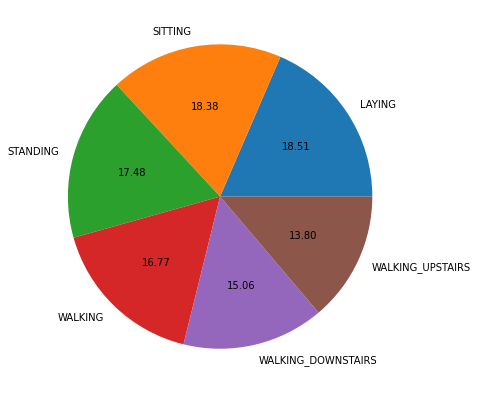

In [7]:
# Count the number of records for each activity
count_of_each_activity = np.array(y__train.value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(y__train.unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [7, 7], 'font.size': 10})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')
plt.savefig("pie chart for training labels.jpg", dpi=600)

In [8]:
for i in range(len(activities)):
    print(activities[i],'=',count_of_each_activity[i])

LAYING = 1525
SITTING = 1514
STANDING = 1440
WALKING = 1382
WALKING_DOWNSTAIRS = 1241
WALKING_UPSTAIRS = 1137


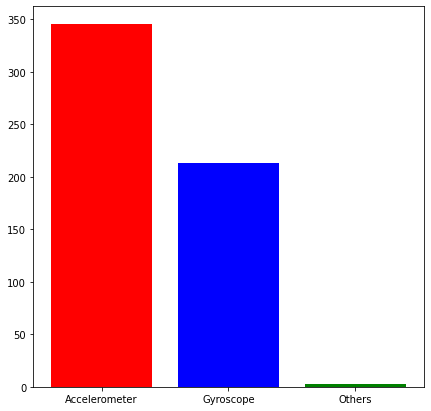

In [9]:
# Count for each type
acc = 0
gyro = 0
others = 0
for column in x__train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1


# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [7, 7], 'font.size': 10})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))
plt.savefig("bar plot for column types.jpg", dpi=600)

In [10]:
standing_activity = ytrain[ytrain['Activity'] == 'WALKING']
# Reset the index for this dataframe
standing_activity

,Unnamed: 0,Activity
1,4482,WALKING
16,5410,WALKING
29,7443,WALKING
45,5001,WALKING
48,2308,WALKING
...,...,...
8191,4807,WALKING
8211,7273,WALKING
8221,4314,WALKING
8231,7917,WALKING


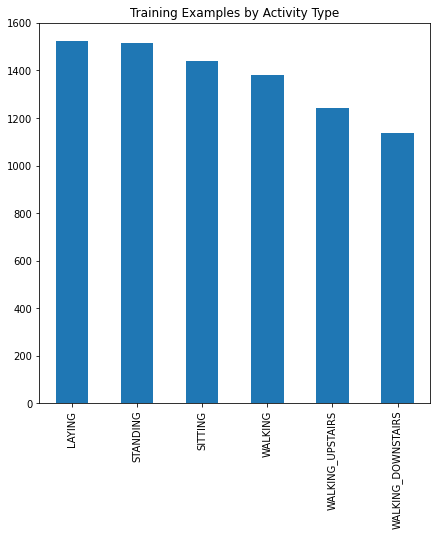

In [11]:
### there are 1514 standing training labels
# Show how many training examples exist for each of the six activities
ytrain['Activity'].value_counts().plot(kind='bar',
                                             title='Training Examples by Activity Type')
plt.savefig("training examples by activity type.jpg", dpi=600)
plt.show()
# Better understand how the recordings are spread across the different
# users who participated in the study
#df['user-id'].value_counts().plot(kind='bar',title='Training Examples by User')
#plt.show()

## Training and evaluation

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  # for Parameter Tuning using gridsearch 
from sklearn.metrics import classification_report  # for classification report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  # for K-nearest neighbors Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import Pipeline  # Assembling steps to cross-validate together
from sklearn.preprocessing import StandardScaler

# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y__train, test_size=0.3, random_state=0)
y_train = np.ravel(y_train)  # to convert array to a flattened array

### Logistic regression model

In [71]:
# training model directly without hyperparamter tuning and pipeline

clf1 = LogisticRegression().fit(X_train,y_train)
prediction = clf1.predict(X_train)
print("Accuracy:", accuracy_score(y_train, prediction))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, prediction))

Accuracy: 0.9897693774926305

 -------------Classification Report-------------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       0.97      0.97      0.97       995
          STANDING       0.97      0.97      0.97      1063
           WALKING       1.00      1.00      1.00       958
WALKING_DOWNSTAIRS       1.00      1.00      1.00       798
  WALKING_UPSTAIRS       1.00      1.00      1.00       857

          accuracy                           0.99      5767
         macro avg       0.99      0.99      0.99      5767
      weighted avg       0.99      0.99      0.99      5767



In [14]:
# Model training with hyperparamter tuning and pipeline

model_lr = LogisticRegression()  
model_lr.fit(X_train, y_train)

In [29]:

param_grid_lr = {
    'clf__max_iter': [10, 20, 50, 100],      #max_iter is the number of iterations.     
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   #solver is the algorithm to use for optimization.
    'clf__class_weight': ['balanced']  #class_weight is to troubleshoot unbalanced data sampling.
}
pipe_lr = Pipeline([
    ('std', StandardScaler()), ('clf',model_lr),
])

In [30]:
# Parameter tuning for Logistic Regression classifier

lrModel_grid = GridSearchCV(pipe_lr,
                            param_grid=param_grid_lr,
                            verbose=1,
                            cv=10, n_jobs=-1, scoring='f1_macro')

lrModel_grid.fit(X_train, y_train)
lrModel = lrModel_grid.best_estimator_
print(lrModel)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Pipeline(steps=[('std', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=10,
                                    solver='liblinear'))])


In [48]:
# Classification report for Logistic Regression Classfier
prediction = lrModel.predict(X_train)
print("Logistic Regression Classfier classification report\n")
print("Accuracy:", accuracy_score(y_train, prediction))
print(classification_report(y_train, prediction))

Logistic Regression Classfier classification report

Accuracy: 0.9916767816889197
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       0.97      0.98      0.98       995
          STANDING       0.98      0.98      0.98      1063
           WALKING       1.00      1.00      1.00       958
WALKING_DOWNSTAIRS       1.00      1.00      1.00       798
  WALKING_UPSTAIRS       1.00      1.00      1.00       857

          accuracy                           0.99      5767
         macro avg       0.99      0.99      0.99      5767
      weighted avg       0.99      0.99      0.99      5767



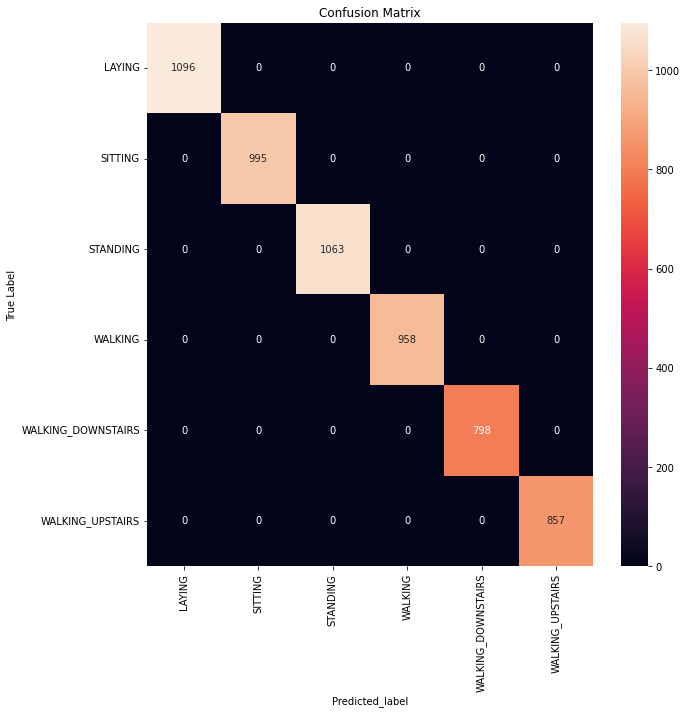

In [60]:
LABELS = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
confusion_matrix_lr = confusion_matrix(y_train, prediction)
 
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix_lr, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()

### Naive bayes 

In [14]:
# training model directly without hyperparamter tuning and pipeline

clf2 = GaussianNB().fit(X_train,y_train)
prediction = clf2.predict(X_train)
print("Accuracy:", accuracy_score(y_train, prediction))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, prediction))

Accuracy: 0.7671232876712328

 -------------Classification Report-------------

                    precision    recall  f1-score   support

            LAYING       0.99      0.98      0.99      1096
           SITTING       0.57      0.89      0.70       995
          STANDING       0.82      0.36      0.50      1063
           WALKING       0.91      0.73      0.81       958
WALKING_DOWNSTAIRS       0.79      0.75      0.77       798
  WALKING_UPSTAIRS       0.69      0.91      0.78       857

          accuracy                           0.77      5767
         macro avg       0.80      0.77      0.76      5767
      weighted avg       0.80      0.77      0.76      5767



In [50]:
# Model training with hyperparamter tuning and pipeline

model_nb = GaussianNB()  
model_nb.fit(X_train, y_train)

GaussianNB()

In [51]:
param_grid_nb = {
    'clf__var_smoothing': np.logspace(0,-12, num=100) #var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean
}

pipe_nb = Pipeline([
    ('std', StandardScaler()), ('clf',model_nb),
])

nbModel_grid = GridSearchCV(pipe_nb,
                            param_grid=param_grid_nb,
                            verbose=1,
                            cv=10, n_jobs=-1, scoring='f1_macro')
nbModel_grid.fit(X_train,y_train)
nbModel = nbModel_grid.best_estimator_

print(nbModel)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Pipeline(steps=[('std', StandardScaler()),
                ('clf', GaussianNB(var_smoothing=0.01519911082952933))])


In [52]:
# Classification report for Naive Bayes Classifier

prediction = nbModel.predict(X_train)
print("Gaussian Naive Bayes Classfier classification report\n")
print("Accuracy:", accuracy_score(y_train, prediction))
print(classification_report(y_train, prediction))

Gaussian Naive Bayes Classfier classification report

Accuracy: 0.8363100398820877
                    precision    recall  f1-score   support

            LAYING       0.98      0.99      0.99      1096
           SITTING       0.90      0.69      0.78       995
          STANDING       0.78      0.92      0.84      1063
           WALKING       0.90      0.72      0.80       958
WALKING_DOWNSTAIRS       0.80      0.74      0.77       798
  WALKING_UPSTAIRS       0.70      0.91      0.79       857

          accuracy                           0.84      5767
         macro avg       0.84      0.83      0.83      5767
      weighted avg       0.85      0.84      0.84      5767



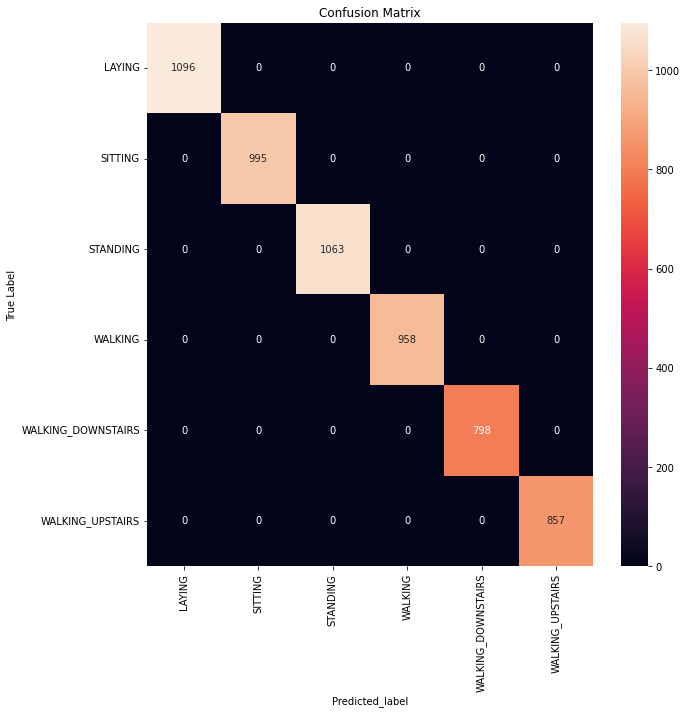

In [61]:
LABELS = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
confusion_matrix_nb = confusion_matrix(y_train, prediction)
 
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix_nb, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()

### K-Nearest Neighbor Classfier

In [15]:
# training model directly without hyperparamter tuning and pipeline

clf3 = KNeighborsClassifier().fit(X_train,y_train)
prediction = clf3.predict(X_train)
print("Accuracy:", accuracy_score(y_train, prediction))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, prediction))

Accuracy: 0.9793653546037802

 -------------Classification Report-------------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       0.95      0.94      0.95       995
          STANDING       0.95      0.96      0.95      1063
           WALKING       0.99      1.00      0.99       958
WALKING_DOWNSTAIRS       1.00      0.98      0.99       798
  WALKING_UPSTAIRS       0.99      1.00      0.99       857

          accuracy                           0.98      5767
         macro avg       0.98      0.98      0.98      5767
      weighted avg       0.98      0.98      0.98      5767



In [54]:
# Model training with hyperparamter tuning and pipeline

model_knn = KNeighborsClassifier() 
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
param_grid_knn = {
    'clf__n_neighbors': [2, 5, 10, 15],      #'n_neighbors' is the value for k-nearest neighbor.                           
    'clf__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],    #'algorithm' is the algorithm to compute the nearest neighbors.
    'clf__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']     #'metric' is the algorithm to find the distance.
}

In [56]:
#Parameter tuning for K-Nearest Neighbor Classfier

pipe_knn = Pipeline([
    ('std', StandardScaler()), ('clf',model_knn),
])

knnModel_grid = GridSearchCV(pipe_knn, 
                             param_grid=param_grid_knn
                             , verbose=1
                             , cv=10, n_jobs=-1, scoring='f1_macro')
knnModel_grid.fit(X_train,y_train)
knnModel = knnModel_grid.best_estimator_
print(knnModel)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Pipeline(steps=[('std', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(algorithm='ball_tree',
                                      metric='manhattan'))])


In [57]:
# Classification report for K-Nearest Neighbor Classifier

prediction = knnModel.predict(X_train)
print("K-Nearest Neighbor Classfier classification report\n")
print("Accuracy:", accuracy_score(y_train, prediction))
print(classification_report(y_train, prediction))

K-Nearest Neighbor Classfier classification report

Accuracy: 0.9845673660482053
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       0.98      0.95      0.96       995
          STANDING       0.96      0.98      0.97      1063
           WALKING       0.99      1.00      0.99       958
WALKING_DOWNSTAIRS       1.00      0.98      0.99       798
  WALKING_UPSTAIRS       0.99      1.00      0.99       857

          accuracy                           0.98      5767
         macro avg       0.99      0.98      0.99      5767
      weighted avg       0.98      0.98      0.98      5767



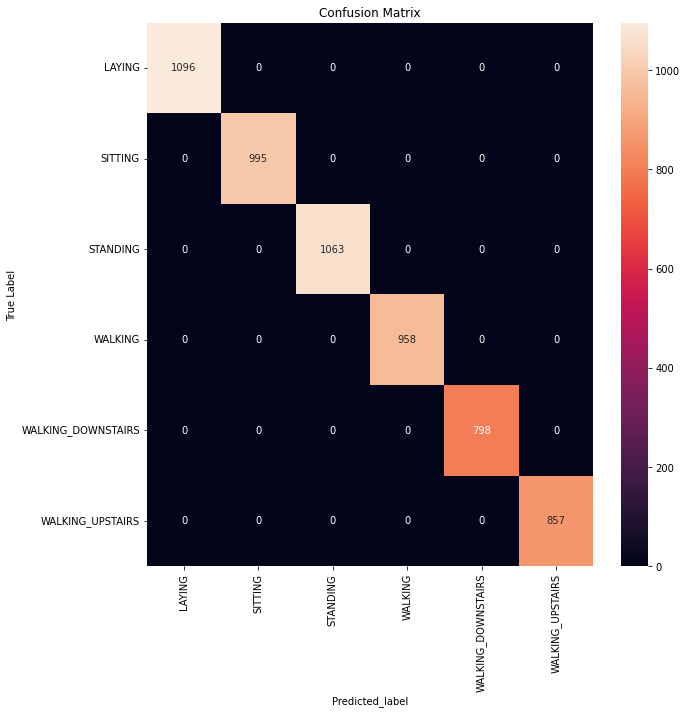

In [59]:
LABELS = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
confusion_matrix_knn = confusion_matrix(y_train.tolist(), prediction.tolist())
 
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix_knn, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()

In [54]:
type(prediction)

numpy.ndarray

### SVM Classifier

In [75]:
# training model directly without hyperparamter tuning and pipeline

clf4 = SVC().fit(X_train, y_train)
prediction = clf4.predict(X_train)
print("Accuracy:", accuracy_score(y_train, prediction))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, prediction))

Accuracy: 0.971909138200104

 -------------Classification Report-------------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       0.94      0.91      0.93       995
          STANDING       0.92      0.95      0.94      1063
           WALKING       0.99      1.00      1.00       958
WALKING_DOWNSTAIRS       0.99      0.99      0.99       798
  WALKING_UPSTAIRS       0.99      0.99      0.99       857

          accuracy                           0.97      5767
         macro avg       0.97      0.97      0.97      5767
      weighted avg       0.97      0.97      0.97      5767



In [76]:
# Model training with hyperparamter tuning and pipeline

model_svm = SVC() 
model_svm.fit(X_train, y_train)

SVC()

In [77]:
param_grid_svm = {'clf__C': [0.1, 1, 10, 100, 1000],
              'clf__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'clf__kernel': ['rbf']}


In [78]:
pipe_svm = Pipeline([
    ('std', StandardScaler()), ('clf',model_svm),
])

svmModel_grid = GridSearchCV(pipe_svm, 
                    param_grid=param_grid_svm, 
                    refit = True, verbose = 1)
 
# fitting the model for grid search
svmModel_grid.fit(X_train,y_train)
svmModel = svmModel_grid.best_estimator_
print(svmModel)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Pipeline(steps=[('std', StandardScaler()), ('clf', SVC(C=1000, gamma=0.001))])


In [79]:
# Classification report for SVM Classifier

prediction = svmModel.predict(X_train)
print("SVM Classfier classification report\n")
print("Accuracy:", accuracy_score(y_train, prediction))
print(classification_report(y_train, prediction))

SVM Classfier classification report

Accuracy: 1.0
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       1.00      1.00      1.00       995
          STANDING       1.00      1.00      1.00      1063
           WALKING       1.00      1.00      1.00       958
WALKING_DOWNSTAIRS       1.00      1.00      1.00       798
  WALKING_UPSTAIRS       1.00      1.00      1.00       857

          accuracy                           1.00      5767
         macro avg       1.00      1.00      1.00      5767
      weighted avg       1.00      1.00      1.00      5767



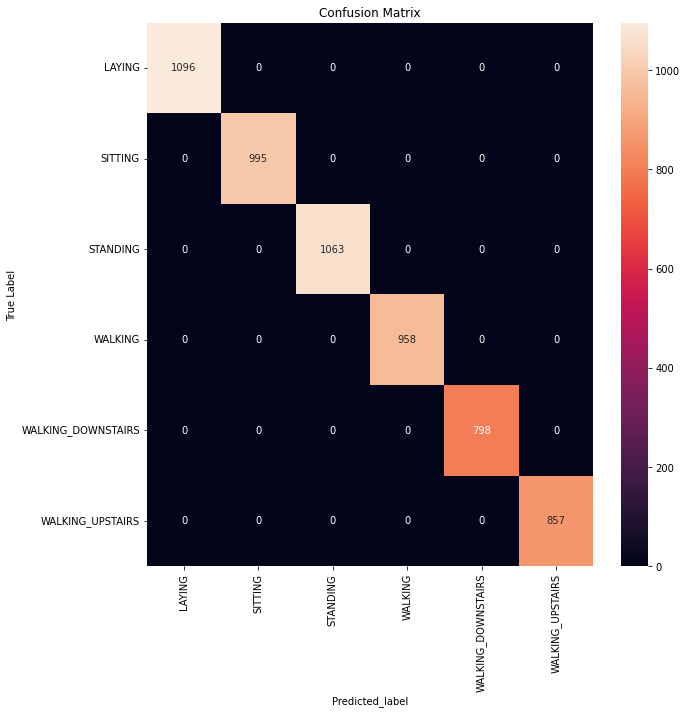

In [80]:
from sklearn.metrics import confusion_matrix

LABELS = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
confusion_matrix_svm = confusion_matrix(y_train, prediction)
 
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix_svm, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()

### Random Forest Classifier

In [72]:
# training model directly without hyperparamter tuning and pipeline

clf5 = RandomForestClassifier().fit(X_train,y_train) 
prediction = clf5.predict(X_train)
print("Accuracy:", accuracy_score(y_train, prediction))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_train, prediction))

Accuracy: 1.0

 -------------Classification Report-------------

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       1.00      1.00      1.00       995
          STANDING       1.00      1.00      1.00      1063
           WALKING       1.00      1.00      1.00       958
WALKING_DOWNSTAIRS       1.00      1.00      1.00       798
  WALKING_UPSTAIRS       1.00      1.00      1.00       857

          accuracy                           1.00      5767
         macro avg       1.00      1.00      1.00      5767
      weighted avg       1.00      1.00      1.00      5767



In [43]:
# Model training with hyperparamter tuning and pipeline

model_rfc = RandomForestClassifier() 
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
param_grid_rfc = {'clf__n_estimators': [1, 5, 100],
                'clf__max_features': ['auto', 'sqrt', 'log2'],
                'clf__max_depth' : [4,5,6,7,8],
                'clf__criterion' :['gini', 'entropy']}

pipe_rfc = Pipeline([
    ('std', StandardScaler()), ('clf',model_rfc),
])

rfcModel_grid = GridSearchCV(pipe_rfc, 
                    param_grid=param_grid_rfc, 
                    refit = True, verbose = 1)

# fitting the model for grid search
rfcModel_grid.fit(X_train,y_train)
rfcModel = rfcModel_grid.best_estimator_
print(rfcModel)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Pipeline(steps=[('std', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=8))])


In [67]:
rfcModel

Pipeline(steps=[('std', StandardScaler()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', max_depth=8))])

In [84]:
prediction = rfcModel.predict(X_train)
print("Random forest Classfier classification report\n")
print("Accuracy:", accuracy_score(y_train, prediction))
print(classification_report(y_train, prediction))

Random forest Classfier classification report

Accuracy: 0.9897693774926305
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1096
           SITTING       0.99      0.95      0.97       995
          STANDING       0.96      0.99      0.98      1063
           WALKING       1.00      1.00      1.00       958
WALKING_DOWNSTAIRS       1.00      0.99      1.00       798
  WALKING_UPSTAIRS       1.00      1.00      1.00       857

          accuracy                           0.99      5767
         macro avg       0.99      0.99      0.99      5767
      weighted avg       0.99      0.99      0.99      5767



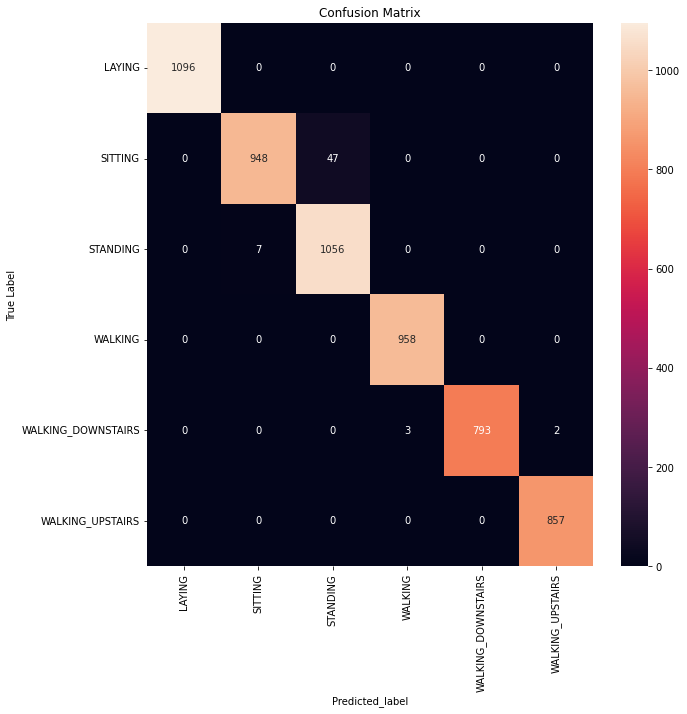

In [85]:
LABELS = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
confusion_matrix_rfc = confusion_matrix(y_train, prediction)
 
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix_rfc, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()

## Testing data

In [ ]:
### Final predictions using best model

In [81]:
pred = svmModel.predict(x__test)

In [82]:
print("The predicted class labels for test data using the best model is: \n",pred)

The predicted class labels for test data using the best model is: 
 ['WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS' 'STANDING' ... 'LAYING'
 'WALKING' 'WALKING']
